In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
import stellargraph as sg

import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("space_data.tsv", sep = "\t")
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [3]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [5]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

In [6]:
plot_nodes(G)

NameError: name 'model' is not defined

In [7]:
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [8]:
get_randomwalk('space exploration', 10)

['space exploration',
 'monkeys and apes in space',
 'space chimps',
 'space chimps 2: zartog strikes back']

In [9]:
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))
        
# count of sequences
len(random_walks)

100%|████████████████| 2088/2088 [00:00<00:00, 3975.55it/s]


10440

In [8]:
random_walks

[['space exploration', 'skylab', 'skylab ii'],
 ['space exploration',
  'artemis program',
  'constellation program',
  'space shuttle program',
  'orbiter (sim)',
  'satellite tool kit',
  'orbiter (simulator)',
  'kerbal space program'],
 ['space exploration', 'space capsule', 'service module'],
 ['space exploration',
  'interstellar spaceflight',
  'intergalactic travel',
  'deep space exploration',
  'interstellar travel',
  'interplanetary spaceflight',
  'interplanetary transport network',
  'planetary grand tour',
  'voyager program',
  'family portrait (voyager)'],
 ['space exploration',
  'space age',
  'space probe',
  'pioneer 10',
  'exploration of jupiter'],
 ['discovery and exploration of the solar system',
  'sample return mission',
  'exploration of mars',
  'colonization of mars',
  'effect of spaceflight on the human body',
  'overview effect',
  'earth phase'],
 ['discovery and exploration of the solar system',
  'sample return mission',
  'asteroid mining',
  'plane

In [11]:
# train skip-gram (word2vec) model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(979244, 1009600)

In [40]:
das = model.wv.vocab
for i in das:
    print(das)
    break

{'space exploration': <gensim.models.keyedvectors.Vocab object at 0x0000014780986E48>, 'skylab': <gensim.models.keyedvectors.Vocab object at 0x000001478065B848>, 'skylab ii': <gensim.models.keyedvectors.Vocab object at 0x000001478065B5C8>, 'artemis program': <gensim.models.keyedvectors.Vocab object at 0x000001478065B688>, 'constellation program': <gensim.models.keyedvectors.Vocab object at 0x000001478065B588>, 'space shuttle program': <gensim.models.keyedvectors.Vocab object at 0x000001478065B2C8>, 'orbiter (sim)': <gensim.models.keyedvectors.Vocab object at 0x000001478065B548>, 'satellite tool kit': <gensim.models.keyedvectors.Vocab object at 0x000001478065B0C8>, 'orbiter (simulator)': <gensim.models.keyedvectors.Vocab object at 0x000001478065B1C8>, 'kerbal space program': <gensim.models.keyedvectors.Vocab object at 0x000001478065B508>, 'space capsule': <gensim.models.keyedvectors.Vocab object at 0x000001478065B3C8>, 'service module': <gensim.models.keyedvectors.Vocab object at 0x0000

In [12]:
model.similar_by_word('space tourism')

[('space flight participant', 0.7922145128250122),
 ('micro-g environment', 0.7468498945236206),
 ('reduced-gravity aircraft', 0.7128109931945801),
 ('astronaut training', 0.6982786059379578),
 ('space tourism society', 0.6961946487426758),
 ('space adventures', 0.6947474479675293),
 ('rocketship tours', 0.6888388395309448),
 ('nuclear powers', 0.6791089773178101),
 ('new mexico spaceport authority', 0.6722627878189087),
 ('potential cultural impact of extraterrestrial contact', 0.6631885766983032)]

In [12]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 
         'moon landing','space food', 'food systems on space exploration missions', 
         'meal, ready-to-eat','space law', 'metalaw', 'moon treaty', 
         'legal aspects of computing','astronaut training', 'reduced-gravity aircraft', 
         'space adaptation syndrome', 'micro-g environment']

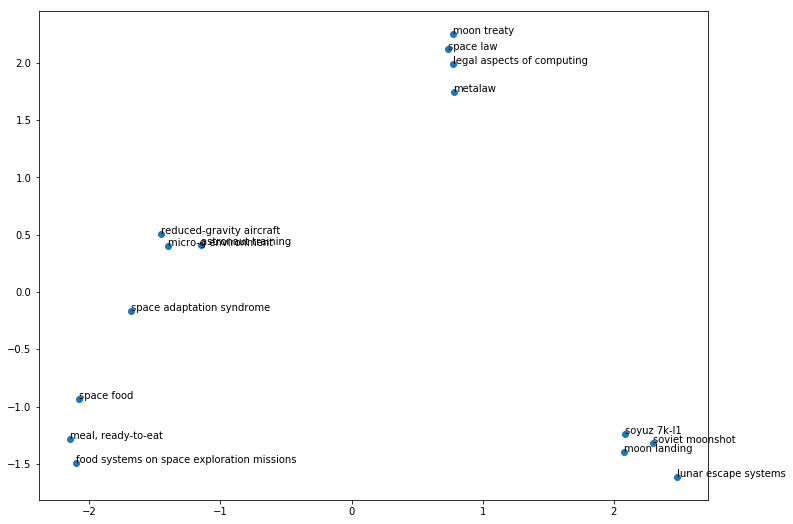

In [14]:
plot_nodes(terms)

In [15]:
similar = model.similar_by_word('space tourism')

In [17]:
similar = [x for x, y in similar]
similar

['space flight participant',
 'reduced-gravity aircraft',
 'astronaut training',
 'micro-g environment',
 'seti',
 'space tourism society',
 'rocketship tours',
 'space adventures',
 'commercial astronaut',
 'satellite internet access']

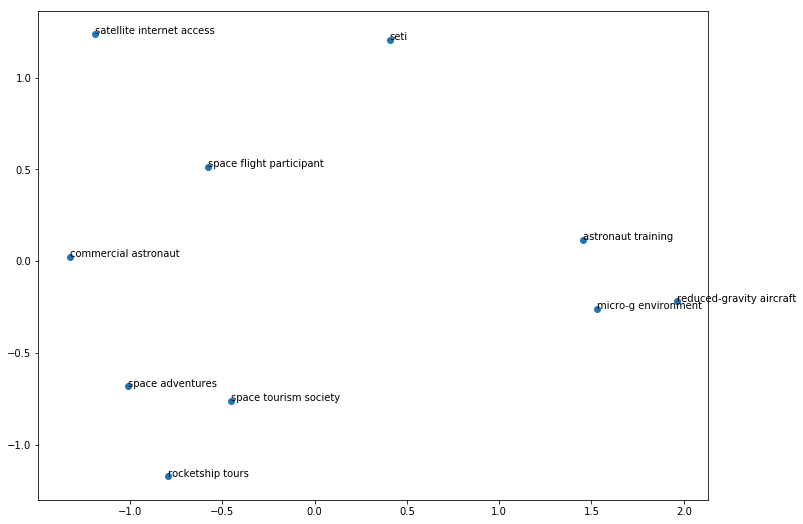

In [18]:
plot_nodes(similar)

# Create Synthetic Data

In [1]:
import random

In [2]:
caselist = ["spf" + str(x) for x in range(20)]
labellist = ["label" + str(x) for x in range(10)]
winEvtList = ["evt" + str(x) for x in range(40)]

case2label = [(x,y) for x, y in zip(caselist, labellist)]
case2winEvt = []

for i in winEvtList:
    case2winEvt.append((random.choice(caselist), random.choice(winEvtList)))

creatededge = [
    ("spf1", "evt5"),
    ("spf1", "evt6"),
    ("spf1", "evt9"),
    ("spf2", "evt5"),
    ("spf2", "evt6"),
    ("spf2", "evt9"),
    ("spf2", "evt11"),
    ("spf2", "evt22"),
    ("spf2", "evt33"),
    ("spf3", "evt5"),
    ("spf3", "evt10"),
    ("spf3", "evt22"),
]
nodelist = caselist + labellist + winEvtList
edgelist = case2label + case2winEvt + creatededge

In [16]:
print(len(nodelist))
edgelist

70


[('spf0', 'label0'),
 ('spf1', 'label1'),
 ('spf2', 'label2'),
 ('spf3', 'label3'),
 ('spf4', 'label4'),
 ('spf5', 'label5'),
 ('spf6', 'label6'),
 ('spf7', 'label7'),
 ('spf8', 'label8'),
 ('spf9', 'label9'),
 ('spf6', 'evt23'),
 ('spf8', 'evt39'),
 ('spf10', 'evt25'),
 ('spf1', 'evt9'),
 ('spf9', 'evt21'),
 ('spf11', 'evt34'),
 ('spf12', 'evt23'),
 ('spf2', 'evt6'),
 ('spf4', 'evt16'),
 ('spf13', 'evt2'),
 ('spf19', 'evt35'),
 ('spf10', 'evt4'),
 ('spf7', 'evt1'),
 ('spf12', 'evt18'),
 ('spf13', 'evt31'),
 ('spf14', 'evt32'),
 ('spf13', 'evt39'),
 ('spf16', 'evt20'),
 ('spf4', 'evt2'),
 ('spf11', 'evt2'),
 ('spf5', 'evt25'),
 ('spf7', 'evt30'),
 ('spf7', 'evt6'),
 ('spf1', 'evt8'),
 ('spf9', 'evt0'),
 ('spf3', 'evt6'),
 ('spf17', 'evt26'),
 ('spf1', 'evt26'),
 ('spf2', 'evt8'),
 ('spf5', 'evt38'),
 ('spf11', 'evt20'),
 ('spf13', 'evt31'),
 ('spf19', 'evt21'),
 ('spf14', 'evt38'),
 ('spf16', 'evt34'),
 ('spf14', 'evt20'),
 ('spf0', 'evt38'),
 ('spf4', 'evt33'),
 ('spf15', 'evt23'),
 (

In [6]:
from pyvis.network import Network

G = nx.Graph()
G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

nt = Network('1000px', '2000px')
nt.show_buttons(filter_=['physics'])
nt.from_nx(G)
nt.show('nx.html')

In [21]:
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

Graph = StellarGraph.from_networkx(G)
rw = BiasedRandomWalk(Graph)

random_walks = rw.run(
    nodes=list(Graph.nodes()),  # root nodes
    length=128,  # maximum length of a random walk (how deep to go)
    n=10,  # number of random walks per root node (samples per node)
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=1.0,  # Defines (unormalised) probability, 1/q, for moving away from source node (2 = half the chance, 1 is full )
    weighted=False,  # since we are interested in unweighted walks
    seed=42,  # for reproducibility
)
print("Number of random walks: {}".format(len(random_walks)))

Number of random walks: 700


In [10]:
model = Word2Vec(random_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

In [14]:
vectors = model.wv.vectors
print(len(vectors))

70


In [19]:
predict = "spf1"
similar = model.similar_by_word(predict)
print(similar)
[(x, y) for x,y in similar if "spf" in x]

[('label1', 0.9952825307846069), ('evt8', 0.987953782081604), ('evt6', 0.9679864048957825), ('evt38', 0.9215779304504395), ('evt22', 0.9139552712440491), ('spf12', 0.9110432267189026), ('evt5', 0.8998021483421326), ('spf2', 0.8977223038673401), ('evt9', 0.8828098177909851), ('evt34', 0.8809205293655396)]


[('spf12', 0.9110432267189026), ('spf2', 0.8977223038673401)]

In [20]:
simnodes = [x for x,y in similar] + [predict]
H = G.subgraph(simnodes)
nt = Network('1000px', '2000px')
nt.show_buttons(filter_=['physics'])
nt.from_nx(H)
nt.show('nx.html')